In [1]:
%pip install data_processing


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our custom feature engineering pipeline
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))


try:
    from data_processing import ComprehensiveFeatureEngineering
except ImportError:
    # Alternative import method
    import importlib.util
    spec = importlib.util.spec_from_file_location("data_processing", "../src/data_processing.py")
    data_processing = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(data_processing)
    ComprehensiveFeatureEngineering = data_processing.ComprehensiveFeatureEngineering

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")
print("✅ Custom feature engineering pipeline loaded!")


✅ All libraries imported successfully!
✅ Custom feature engineering pipeline loaded!


In [5]:
# Initialize the comprehensive feature engineering pipeline
fe = ComprehensiveFeatureEngineering(
    customer_col='CustomerId',
    date_col='TransactionStartTime', 
    amount_col='Amount',
    value_col='Value'
)

# Load the data
print("Loading data...")
data = fe.load_data('../data/raw/data.csv')

print(f"Data shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print(f"Sample of data:")
data.head()


Loading data...


INFO:data_processing:Data loaded successfully: (95662, 16)


Data shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
Sample of data:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
# Create customer-level features using our comprehensive pipeline
print("🔧 Creating customer-level features...")
print("This includes:")
print("✅ RFM Analysis (Recency, Frequency, Monetary)")
print("✅ Statistical Aggregates (mean, std, min, max, median)")
print("✅ Derived Features (ranges, coefficients of variation)")
print("✅ Risk Proxy Creation (binary target variable)")
print("✅ Weight of Evidence Transformations")
print("✅ Feature Scaling with StandardScaler")

# Apply the complete feature engineering pipeline
customer_features = fe.fit_transform_customers(data, include_woe=True)

print(f"\n📊 Results:")
print(f"Customer features shape: {customer_features.shape}")
print(f"Features created: {list(customer_features.columns)}")

# Display sample of engineered features
print(f"\n📋 Sample of engineered features:")
customer_features.head()


INFO:data_processing:Applying customer-level feature engineering...


🔧 Creating customer-level features...
This includes:
✅ RFM Analysis (Recency, Frequency, Monetary)
✅ Statistical Aggregates (mean, std, min, max, median)
✅ Derived Features (ranges, coefficients of variation)
✅ Risk Proxy Creation (binary target variable)
✅ Weight of Evidence Transformations
✅ Feature Scaling with StandardScaler


INFO:data_processing:Aggregate features created for 3742 customers
INFO:data_processing:Risk proxy created based on RFM analysis
INFO:data_processing:Numerical columns: ['Recency', 'Frequency', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Min_Amount', 'Max_Amount', 'Median_Amount', 'Total_Value', 'Avg_Value', 'Std_Value', 'Amount_Range', 'Amount_CV', 'Value_CV', 'Recency_Score', 'Frequency_Score', 'Total_Amount_Score', 'RFM_Score', 'Risk_Proxy']
INFO:data_processing:Categorical columns: []
INFO:data_processing:Customer-level feature engineering completed: (3742, 19)



📊 Results:
Customer features shape: (3742, 19)
Features created: ['Recency', 'Frequency', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Min_Amount', 'Max_Amount', 'Median_Amount', 'Total_Value', 'Avg_Value', 'Std_Value', 'Amount_Range', 'Amount_CV', 'Value_CV', 'Recency_Score', 'Frequency_Score', 'Total_Amount_Score', 'RFM_Score', 'Risk_Proxy']

📋 Sample of engineered features:


,Recency,Frequency,Total_Amount,Avg_Amount,Std_Amount,Min_Amount,Max_Amount,Median_Amount,Total_Value,Avg_Value,Std_Value,Amount_Range,Amount_CV,Value_CV,Recency_Score,Frequency_Score,Total_Amount_Score,RFM_Score,Risk_Proxy
CustomerId,,,,,,,,,,,,,,,,,,,
CustomerId_1,1.937605,-0.253459,-0.066891,-0.153364,-0.140432,-0.161532,-0.169081,-0.129004,-0.089524,-0.052297,-0.131508,-0.136457,-0.042424,-0.999649,-1.412501,-1.283598,-1.397028,-1.650973,1
CustomerId_10,1.937605,-0.253459,-0.066891,-0.153364,-0.140432,-0.161532,-0.169081,-0.129004,-0.089524,-0.052297,-0.131508,-0.136457,-0.042424,-0.999649,-1.412501,-1.283598,-1.397028,-1.650973,1
CustomerId_1001,2.158882,-0.212186,-0.055849,-0.069870,-0.072731,-0.103274,-0.113497,-0.045153,-0.082011,-0.075710,-0.089197,-0.092884,-0.042424,-0.225037,-1.412501,-0.606420,0.006753,-0.816041,1
CustomerId_1002,-0.201408,-0.150278,-0.061655,-0.091435,-0.134647,-0.045890,-0.137120,-0.073976,-0.091448,-0.109431,-0.126154,-0.131882,-0.042424,0.373134,-0.031914,0.747936,-0.695138,0.018891,0
CustomerId_1003,-0.717722,-0.201868,-0.055849,-0.073846,-0.078186,-0.103274,-0.113497,-0.057289,-0.081422,-0.080169,-0.090795,-0.092884,-0.042424,-0.149926,0.658380,0.070758,0.006753,0.297202,0


🎯 RISK PROXY ANALYSIS
Total customers: 3,742

Risk Distribution:
  Good Customers: 2,292 (61.3%)
  Bad Customers: 1,450 (38.7%)


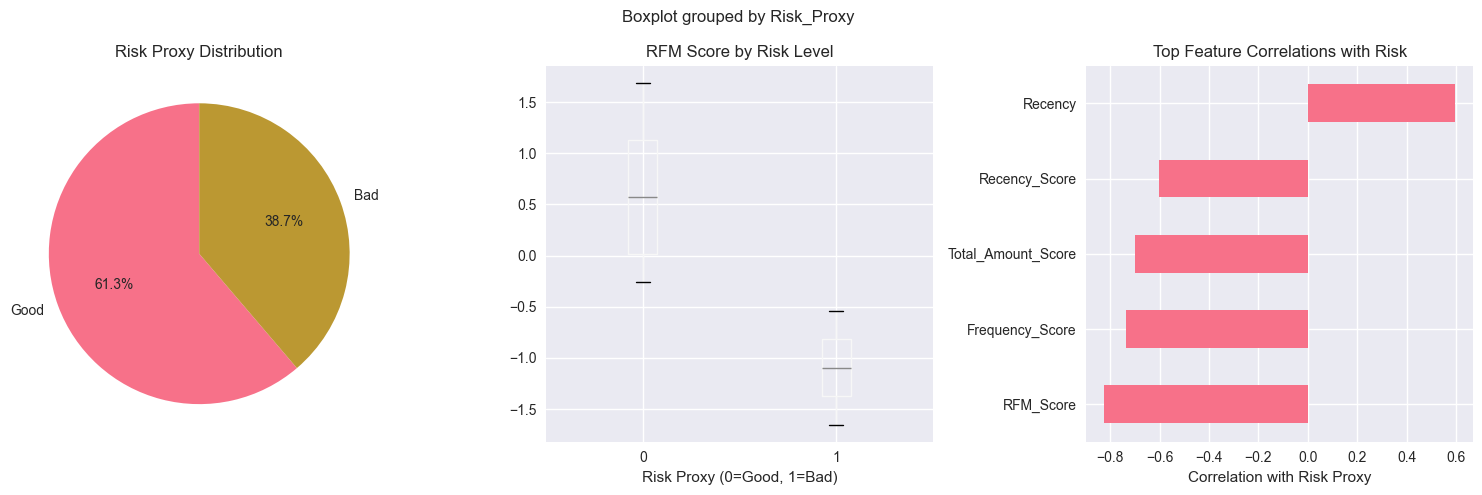

In [7]:
# Analyze Risk Proxy Distribution
print("🎯 RISK PROXY ANALYSIS")
print("="*50)

risk_dist = customer_features['Risk_Proxy'].value_counts()
total_customers = len(customer_features)

print(f"Total customers: {total_customers:,}")
print(f"\nRisk Distribution:")
for value, count in risk_dist.items():
    risk_type = "Good Customers" if value == 0 else "Bad Customers"
    percentage = (count / total_customers) * 100
    print(f"  {risk_type}: {count:,} ({percentage:.1f}%)")

# Visualize risk distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Risk distribution pie chart
axes[0].pie(risk_dist.values, labels=['Good', 'Bad'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Risk Proxy Distribution')

# RFM Score by Risk
if 'RFM_Score' in customer_features.columns:
    customer_features.boxplot(column='RFM_Score', by='Risk_Proxy', ax=axes[1])
    axes[1].set_title('RFM Score by Risk Level')
    axes[1].set_xlabel('Risk Proxy (0=Good, 1=Bad)')

# Feature correlation with Risk_Proxy
correlations = customer_features.corr()['Risk_Proxy'].sort_values(key=abs, ascending=False)
top_corr = correlations[1:6]  # Exclude Risk_Proxy itself
top_corr.plot(kind='barh', ax=axes[2])
axes[2].set_title('Top Feature Correlations with Risk')
axes[2].set_xlabel('Correlation with Risk Proxy')

plt.tight_layout()
plt.show()


In [8]:
# Save the engineered features for model training
import os

# Create processed data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save customer features
output_path = '../data/processed/customer_features.csv'
customer_features.to_csv(output_path)

print("💾 FEATURES SAVED SUCCESSFULLY!")
print("="*50)
print(f"📁 File: {output_path}")
print(f"📊 Shape: {customer_features.shape}")
print(f"🎯 Target variable: 'Risk_Proxy' (0=Good, 1=Bad)")
print(f"🔧 Features are scaled and ready for model training!")

# Feature summary
print(f"\n📋 FEATURE ENGINEERING SUMMARY:")
print(f"✅ Original transactions: {len(data):,}")
print(f"✅ Unique customers: {len(customer_features):,}")
print(f"✅ Features created: {customer_features.shape[1]}")
print(f"✅ Missing values: {customer_features.isnull().sum().sum()}")
print(f"✅ Data types: {customer_features.dtypes.value_counts().to_dict()}")

print(f"\n🚀 READY FOR MODEL TRAINING!")


💾 FEATURES SAVED SUCCESSFULLY!
📁 File: ../data/processed/customer_features.csv
📊 Shape: (3742, 19)
🎯 Target variable: 'Risk_Proxy' (0=Good, 1=Bad)
🔧 Features are scaled and ready for model training!

📋 FEATURE ENGINEERING SUMMARY:
✅ Original transactions: 95,662
✅ Unique customers: 3,742
✅ Features created: 19
✅ Missing values: 0
✅ Data types: {dtype('float64'): 18, dtype('int32'): 1}

🚀 READY FOR MODEL TRAINING!
